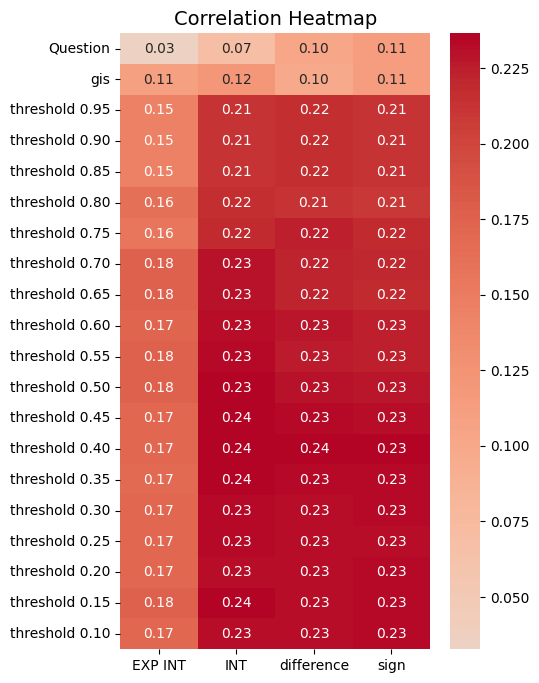

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取Excel文件
data = pd.read_excel('rare_words.xlsx')

# 指标列: 除了"Unnamed: 0", "d_id", "d", "id", "text", "EXP INT", "INT", "difference", "Question"之外的其他列
indicator_columns = data.drop(columns=["number", "d_id", "d", "id", "text", "blank", "EXP INT", "INT", "difference", "sign"])

# 目标列: "EXP INT", "INT", "difference"
target_columns = ["EXP INT", "INT", "difference", "sign"]

# 计算每个指标列与目标列之间的相关系数
correlation_matrix = indicator_columns.corrwith(data[target_columns[0]])
correlation_matrix = correlation_matrix.to_frame('EXP INT')
correlation_matrix['INT'] = indicator_columns.corrwith(data[target_columns[1]])
correlation_matrix['difference'] = indicator_columns.corrwith(data[target_columns[2]])
correlation_matrix['sign'] = indicator_columns.corrwith(data[target_columns[3]])

# 打印相关系数矩阵
# print(correlation_matrix)

# 绘制热力图
plt.figure(figsize=(5, 8))  # 调整图表大小
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", annot_kws={"size": 10})  # 隐藏数值和调整字体大小
plt.title("Correlation Heatmap", fontsize=14)  # 调整图表标题字体大小

# 保存图像为矢量图（SVG格式）
plt.savefig('heatmap.svg', format='svg', bbox_inches='tight')

# 显示图像（如果需要）
plt.show()

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 读取数据
data = pd.read_excel('rare_words.xlsx')

# 提取输入特征和输出
X = data[['Question']].values
# X = data[['Question', 'gis', 'threshold 0.95']].values

y = data[['EXP INT']].values
# y = data[['EXP INT', 'INT', 'difference', 'sign']].values


# 数据预处理
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建BP神经网络模型
model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4))  # 输出层

# 编译模型
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))

# 训练模型
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2)

# 模型评估
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

# 预测和应用
y_pred = model.predict(X_test)

# 还原预测值和真实值的标准化
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# 输出预测结果
print('Predictions:')
print(y_pred)

# 输出真实结果
print('Ground Truth:')
print(y_test)


Epoch 1/100
60/60 [==============================] - 0s 2ms/step - loss: 1.0041 - val_loss: 1.0783
Epoch 2/100
60/60 [==============================] - 0s 823us/step - loss: 0.9905 - val_loss: 1.0775
Epoch 3/100
60/60 [==============================] - 0s 723us/step - loss: 0.9891 - val_loss: 1.0762
Epoch 4/100
60/60 [==============================] - 0s 750us/step - loss: 0.9869 - val_loss: 1.0766
Epoch 5/100
60/60 [==============================] - 0s 728us/step - loss: 0.9858 - val_loss: 1.0794
Epoch 6/100
60/60 [==============================] - 0s 753us/step - loss: 0.9849 - val_loss: 1.0784
Epoch 7/100
60/60 [==============================] - 0s 765us/step - loss: 0.9844 - val_loss: 1.0786
Epoch 8/100
60/60 [==============================] - 0s 733us/step - loss: 0.9840 - val_loss: 1.0780
Epoch 9/100
60/60 [==============================] - 0s 747us/step - loss: 0.9845 - val_loss: 1.0786
Epoch 10/100
60/60 [==============================] - 0s 915us/step - loss: 0.9848 - val_loss

In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical

# 读取数据
data = pd.read_excel('rare_words.xlsx')

# 提取输入和输出特征
input_features = data[['Question', 'gis', 'threshold 0.95']]
output_features1 = data[['sign']]
output_features2 = data[['difference']]
output_features3 = data[['EXP INT', 'INT']]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(input_features, output_features1, test_size=0.2, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 构建神经网络模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(output_features.shape[1], activation='softmax')  # 输出层，使用softmax激活函数进行三分类
])

# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 将输出特征转换为独热编码（one-hot encoding），适用于多分类任务
y_train_encoded = to_categorical(y_train, num_classes=output_features.shape[1])
y_test_encoded = to_categorical(y_test, num_classes=output_features.shape[1])

# 训练模型
model.fit(X_train, y_train_encoded, epochs=100, batch_size=16, validation_split=0.1)

# 评估模型
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test loss: {loss}')
print(f'Accuracy: {accuracy}')

# 进行预测
predictions = model.predict(X_test)

# 将预测的概率转换为类别
y_pred_classes = np.argmax(predictions, axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)

# 计算其他评估指标
precision = precision_score(y_test_classes, y_pred_classes, average='macro')
recall = recall_score(y_test_classes, y_pred_classes, average='macro')
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Epoch 1/100
134/134 [==============================] - 0s 1ms/step - loss: 1.1684 - accuracy: 0.4252 - val_loss: 1.0870 - val_accuracy: 0.4370
Epoch 2/100
134/134 [==============================] - 0s 623us/step - loss: 1.0572 - accuracy: 0.4467 - val_loss: 1.0695 - val_accuracy: 0.4622
Epoch 3/100
134/134 [==============================] - 0s 597us/step - loss: 1.0486 - accuracy: 0.4463 - val_loss: 1.0745 - val_accuracy: 0.4412
Epoch 4/100
134/134 [==============================] - 0s 623us/step - loss: 1.0456 - accuracy: 0.4589 - val_loss: 1.0756 - val_accuracy: 0.4622
Epoch 5/100
134/134 [==============================] - 0s 640us/step - loss: 1.0420 - accuracy: 0.4561 - val_loss: 1.0764 - val_accuracy: 0.4370
Epoch 6/100
134/134 [==============================] - 0s 633us/step - loss: 1.0426 - accuracy: 0.4505 - val_loss: 1.0699 - val_accuracy: 0.4790
Epoch 7/100
134/134 [==============================] - 0s 643us/step - loss: 1.0426 - accuracy: 0.4514 - val_loss: 1.0785 - val_accu

In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical

# 读取数据
data = pd.read_excel('rare_words.xlsx')

# 提取输入和输出特征
input_features = data[['Question', 'gis']]
output_features = data[['sign']]

# 将输出特征转换为独热编码（one-hot encoding），适用于多分类任务
output_features_encoded = to_categorical(output_features)

# 循环替换threshold并训练模型
for threshold in [0.95, 0.90, 0.85, 0.80, 0.75, 0.70, 0.65, 0.60, 0.55, 0.50, 0.45, 0.40, 0.35, 0.30, 0.25, 0.20, 0.15, 0.10]:
    print(f"Threshold: {threshold}")

    # 划分训练集和测试集
    X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(input_features, output_features_encoded, test_size=0.2, random_state=42)

    # 特征标准化
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # 构建神经网络模型
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(output_features_encoded.shape[1], activation='softmax')  # 输出层，使用softmax激活函数进行三分类
    ])

    # 编译模型
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 训练模型
    model.fit(X_train, y_train_encoded, epochs=100, batch_size=16, validation_split=0.1, verbose=0)

    # 评估模型
    loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
    print(f'Test loss: {loss}')
    print(f'Accuracy: {accuracy}')

    # 进行预测
    predictions = model.predict(X_test)

    # 将预测的概率转换为类别
    y_pred_classes = np.argmax(predictions, axis=1)
    y_test_classes = np.argmax(y_test_encoded, axis=1)

    # 计算其他评估指标
    precision = precision_score(y_test_classes, y_pred_classes, average='macro')
    recall = recall_score(y_test_classes, y_pred_classes, average='macro')
    f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print()


Threshold: 0.95
Test loss: 0.6787168979644775
Accuracy: 0.5848739743232727
Precision: 0.5612121212121213
Recall: 0.5175652173913043
F1 Score: 0.4433671053877474

Threshold: 0.9
Test loss: 0.6795303225517273
Accuracy: 0.5865546464920044
Precision: 0.5984498363181205
Recall: 0.5118550724637682
F1 Score: 0.40763913620617087

Threshold: 0.85
Test loss: 0.6792836785316467
Accuracy: 0.5865546464920044
Precision: 0.5930434782608696
Recall: 0.5124057971014493
F1 Score: 0.41074879227053146

Threshold: 0.8
Test loss: 0.6787126064300537
Accuracy: 0.5865546464920044
Precision: 0.5886482627320324
Recall: 0.5129565217391304
F1 Score: 0.4138071895424837

Threshold: 0.75
Test loss: 0.6787240505218506
Accuracy: 0.5899159908294678
Precision: 0.6122481358083453
Recall: 0.5164057971014493
F1 Score: 0.41857298474945537

Threshold: 0.7
Test loss: 0.6796683669090271
Accuracy: 0.5865546464920044
Precision: 0.6052461139896372
Recall: 0.5113043478260869
F1 Score: 0.4044771018455228

Threshold: 0.65
Test loss: 0

In [2]:
#EXP INT
print('EXP INT(5分类)')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# 读取数据
data = pd.read_excel('rare_words.xlsx')

# 提取输入和输出特征
input_features = data[['Question', 'gis']]
output_features = data[['EXP INT']]

# 将EXP INT进行One-hot编码
output_features_encoded = to_categorical(output_features, num_classes=5)

# 创建一个空的DataFrame来存储结果
results_df = pd.DataFrame(columns=['Threshold', 'Test Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# 循环替换threshold并训练模型
threshold_columns = ['threshold 0.95', 'threshold 0.90', 'threshold 0.85', 'threshold 0.80', 'threshold 0.75',
                     'threshold 0.70', 'threshold 0.65', 'threshold 0.60', 'threshold 0.55', 'threshold 0.50',
                     'threshold 0.45', 'threshold 0.40', 'threshold 0.35', 'threshold 0.30', 'threshold 0.25',
                     'threshold 0.20', 'threshold 0.15', 'threshold 0.10']

for col in threshold_columns:
    print(f"Using column: {col}")

    # 使用.copy()方法创建input_features的副本，并对副本进行赋值
    input_features_copy = input_features.copy()
    input_features_copy['threshold'] = data[col]
    # print(input_features_copy)
    
    # 划分训练集和测试集
    X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(input_features_copy, output_features_encoded, test_size=0.2, random_state=42)
    
    # 特征标准化
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # 构建模型
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(5, activation='softmax'))  # 输出层使用softmax激活函数

    # 编译模型
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 训练模型
    model.fit(X_train, y_train_encoded, epochs=100, batch_size=16, validation_split=0.1, verbose=0)

    # 评估模型
    loss, accuracy = model.evaluate(X_test, y_test_encoded)

    # 进行预测
    y_pred_prob = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred_prob, axis=1)

    # 计算其他评估指标
    precision = precision_score(y_test_encoded.argmax(axis=1), y_pred_classes, average='weighted')
    recall = recall_score(y_test_encoded.argmax(axis=1), y_pred_classes, average='weighted')
    f1 = f1_score(y_test_encoded.argmax(axis=1), y_pred_classes, average='weighted')

    # 将结果添加到结果表格中
    results_df = results_df.append({
        'Threshold': col,
        'Test Loss': loss,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

# 打印结果表格
print('EXP INT(5-class)')
print(results_df)

EXP INT(5分类)
Using column: threshold 0.95
19/19 [==============================] - 0s 525us/step - loss: 1.4164 - accuracy: 0.3529
Using column: threshold 0.90
19/19 [==============================] - 0s 528us/step - loss: 1.4238 - accuracy: 0.3630
Using column: threshold 0.85


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19/19 [==============================] - 0s 544us/step - loss: 1.4322 - accuracy: 0.3630
Using column: threshold 0.80
19/19 [==============================] - 0s 527us/step - loss: 1.4240 - accuracy: 0.3580
Using column: threshold 0.75
19/19 [==============================] - 0s 525us/step - loss: 1.4151 - accuracy: 0.3546
Using column: threshold 0.70
19/19 [==============================] - 0s 544us/step - loss: 1.4134 - accuracy: 0.3731
Using column: threshold 0.65
19/19 [==============================] - 0s 518us/step - loss: 1.4322 - accuracy: 0.3412
Using column: threshold 0.60
19/19 [==============================] - 0s 449us/step - loss: 1.4200 - accuracy: 0.3580
Using column: threshold 0.55
19/19 [==============================] - 0s 630us/step - loss: 1.4059 - accuracy: 0.3563
Using column: threshold 0.50
19/19 [==============================] - 0s 499us/step - loss: 1.4102 - accuracy: 0.3529
Using column: threshold 0.45
19/19 [==============================] - 0s 579us/step -

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19/19 [==============================] - 0s 545us/step - loss: 1.4066 - accuracy: 0.3563
Using column: threshold 0.35
19/19 [==============================] - 0s 448us/step - loss: 1.4116 - accuracy: 0.3513
Using column: threshold 0.30
19/19 [==============================] - 0s 518us/step - loss: 1.4017 - accuracy: 0.3462
Using column: threshold 0.25


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19/19 [==============================] - 0s 525us/step - loss: 1.4158 - accuracy: 0.3462
Using column: threshold 0.20
19/19 [==============================] - 0s 577us/step - loss: 1.4043 - accuracy: 0.3513
Using column: threshold 0.15
19/19 [==============================] - 0s 527us/step - loss: 1.4031 - accuracy: 0.3479
Using column: threshold 0.10
19/19 [==============================] - 0s 573us/step - loss: 1.4026 - accuracy: 0.3328
EXP INT(5-class)
         Threshold  Test Loss  Accuracy  Precision    Recall  F1 Score
0   threshold 0.95   1.416394  0.352941   0.253600  0.352941  0.287891
1   threshold 0.90   1.423782  0.363025   0.248901  0.363025  0.269153
2   threshold 0.85   1.432245  0.363025   0.318158  0.363025  0.275631
3   threshold 0.80   1.423994  0.357983   0.293557  0.357983  0.252633
4   threshold 0.75   1.415089  0.354622   0.284868  0.354622  0.263427
5   threshold 0.70   1.413436  0.373109   0.354537  0.373109  0.288034
6   threshold 0.65   1.432249  0.341176   0

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [3]:
#EXP INT
print('INT(5分类)')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# 读取数据
data = pd.read_excel('rare_words.xlsx')

# 提取输入和输出特征
input_features = data[['Question', 'gis']]
output_features = data[['INT']]

# 将EXP INT进行One-hot编码
output_features_encoded = to_categorical(output_features, num_classes=5)

# 创建一个空的DataFrame来存储结果
results_df = pd.DataFrame(columns=['Threshold', 'Test Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# 循环替换threshold并训练模型
threshold_columns = ['threshold 0.95', 'threshold 0.90', 'threshold 0.85', 'threshold 0.80', 'threshold 0.75',
                     'threshold 0.70', 'threshold 0.65', 'threshold 0.60', 'threshold 0.55', 'threshold 0.50',
                     'threshold 0.45', 'threshold 0.40', 'threshold 0.35', 'threshold 0.30', 'threshold 0.25',
                     'threshold 0.20', 'threshold 0.15', 'threshold 0.10']

for col in threshold_columns:
    print(f"Using column: {col}")

    # 使用.copy()方法创建input_features的副本，并对副本进行赋值
    input_features_copy = input_features.copy()
    input_features_copy['threshold'] = data[col]
    # print(input_features_copy)
    
    # 划分训练集和测试集
    X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(input_features_copy, output_features_encoded, test_size=0.2, random_state=42)
    
    # 特征标准化
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # 构建模型
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(5, activation='softmax'))  # 输出层使用softmax激活函数

    # 编译模型
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 训练模型
    model.fit(X_train, y_train_encoded, epochs=100, batch_size=16, validation_split=0.1, verbose=0)

    # 评估模型
    loss, accuracy = model.evaluate(X_test, y_test_encoded)

    # 进行预测
    y_pred_prob = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred_prob, axis=1)

    # 计算其他评估指标
    precision = precision_score(y_test_encoded.argmax(axis=1), y_pred_classes, average='weighted')
    recall = recall_score(y_test_encoded.argmax(axis=1), y_pred_classes, average='weighted')
    f1 = f1_score(y_test_encoded.argmax(axis=1), y_pred_classes, average='weighted')

    # 将结果添加到结果表格中
    results_df = results_df.append({
        'Threshold': col,
        'Test Loss': loss,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

# 打印结果表格
print('INT(5-class)')
print(results_df)

INT(5分类)
Using column: threshold 0.95
19/19 [==============================] - 0s 515us/step - loss: 1.4415 - accuracy: 0.3277
Using column: threshold 0.90
19/19 [==============================] - 0s 525us/step - loss: 1.4403 - accuracy: 0.3378
Using column: threshold 0.85
19/19 [==============================] - 0s 552us/step - loss: 1.4539 - accuracy: 0.3311
Using column: threshold 0.80
19/19 [==============================] - 0s 527us/step - loss: 1.4367 - accuracy: 0.3479
Using column: threshold 0.75


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19/19 [==============================] - 0s 492us/step - loss: 1.4498 - accuracy: 0.3429
Using column: threshold 0.70


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19/19 [==============================] - 0s 578us/step - loss: 1.4586 - accuracy: 0.3227
Using column: threshold 0.65
19/19 [==============================] - 0s 648us/step - loss: 1.4618 - accuracy: 0.3277
Using column: threshold 0.60
19/19 [==============================] - 0s 634us/step - loss: 1.4525 - accuracy: 0.3261
Using column: threshold 0.55
19/19 [==============================] - 0s 578us/step - loss: 1.4510 - accuracy: 0.3210
Using column: threshold 0.50


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19/19 [==============================] - 0s 525us/step - loss: 1.4624 - accuracy: 0.3261
Using column: threshold 0.45
19/19 [==============================] - 0s 586us/step - loss: 1.4423 - accuracy: 0.3143
Using column: threshold 0.40
19/19 [==============================] - 0s 472us/step - loss: 1.4599 - accuracy: 0.3059
Using column: threshold 0.35
19/19 [==============================] - 0s 505us/step - loss: 1.4532 - accuracy: 0.2908
Using column: threshold 0.30
19/19 [==============================] - 0s 525us/step - loss: 1.4664 - accuracy: 0.3025
Using column: threshold 0.25


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19/19 [==============================] - 0s 637us/step - loss: 1.4554 - accuracy: 0.3109
Using column: threshold 0.20
19/19 [==============================] - 0s 629us/step - loss: 1.4572 - accuracy: 0.3176
Using column: threshold 0.15
19/19 [==============================] - 0s 581us/step - loss: 1.4513 - accuracy: 0.3126
Using column: threshold 0.10


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19/19 [==============================] - 0s 525us/step - loss: 1.4435 - accuracy: 0.3311
INT(5-class)
         Threshold  Test Loss  Accuracy  Precision    Recall  F1 Score
0   threshold 0.95   1.441471  0.327731   0.322671  0.327731  0.287068
1   threshold 0.90   1.440311  0.337815   0.340087  0.337815  0.293805
2   threshold 0.85   1.453852  0.331092   0.336736  0.331092  0.300400
3   threshold 0.80   1.436696  0.347899   0.316591  0.347899  0.308676
4   threshold 0.75   1.449778  0.342857   0.334505  0.342857  0.305665
5   threshold 0.70   1.458581  0.322689   0.334155  0.322689  0.289526
6   threshold 0.65   1.461807  0.327731   0.316672  0.327731  0.290539
7   threshold 0.60   1.452520  0.326050   0.333129  0.326050  0.289723
8   threshold 0.55   1.451044  0.321008   0.309892  0.321008  0.285189
9   threshold 0.50   1.462386  0.326050   0.349188  0.326050  0.282865
10  threshold 0.45   1.442314  0.314286   0.330109  0.314286  0.287655
11  threshold 0.40   1.459900  0.305882   0.29

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
#EXP INT
print('difference(9分类)')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# 读取数据
data = pd.read_excel('rare_words.xlsx')

# 提取输入和输出特征
input_features = data[['Question', 'gis']]
output_features = data[['difference']]

# 将EXP INT进行One-hot编码
output_features_encoded = to_categorical(output_features, num_classes=9)

# 创建一个空的DataFrame来存储结果
results_df = pd.DataFrame(columns=['Threshold', 'Test Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# 循环替换threshold并训练模型
threshold_columns = ['threshold 0.95', 'threshold 0.90', 'threshold 0.85', 'threshold 0.80', 'threshold 0.75',
                     'threshold 0.70', 'threshold 0.65', 'threshold 0.60', 'threshold 0.55', 'threshold 0.50',
                     'threshold 0.45', 'threshold 0.40', 'threshold 0.35', 'threshold 0.30', 'threshold 0.25',
                     'threshold 0.20', 'threshold 0.15', 'threshold 0.10']

for col in threshold_columns:
    print(f"Using column: {col}")

    # 使用.copy()方法创建input_features的副本，并对副本进行赋值
    input_features_copy = input_features.copy()
    input_features_copy['threshold'] = data[col]
    # print(input_features_copy)
    
    # 划分训练集和测试集
    X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(input_features_copy, output_features_encoded, test_size=0.2, random_state=42)
    
    # 特征标准化
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # 构建模型
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(9, activation='softmax'))  # 输出层使用softmax激活函数

    # 编译模型
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 训练模型
    model.fit(X_train, y_train_encoded, epochs=100, batch_size=16, validation_split=0.1, verbose=0)

    # 评估模型
    loss, accuracy = model.evaluate(X_test, y_test_encoded)

    # 进行预测
    y_pred_prob = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred_prob, axis=1)

    # 计算其他评估指标
    precision = precision_score(y_test_encoded.argmax(axis=1), y_pred_classes, average='weighted')
    recall = recall_score(y_test_encoded.argmax(axis=1), y_pred_classes, average='weighted')
    f1 = f1_score(y_test_encoded.argmax(axis=1), y_pred_classes, average='weighted')

    # 将结果添加到结果表格中
    results_df = results_df.append({
        'Threshold': col,
        'Test Loss': loss,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

# 打印结果表格
print('difference(9-class)')
print(results_df)

difference(9分类)
Using column: threshold 0.95
19/19 [==============================] - 0s 473us/step - loss: 1.5237 - accuracy: 0.4134
Using column: threshold 0.90


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19/19 [==============================] - 0s 497us/step - loss: 1.5273 - accuracy: 0.4034
Using column: threshold 0.85


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19/19 [==============================] - 0s 581us/step - loss: 1.5124 - accuracy: 0.4101
Using column: threshold 0.80


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19/19 [==============================] - 0s 611us/step - loss: 1.5034 - accuracy: 0.4067
Using column: threshold 0.75


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19/19 [==============================] - 0s 567us/step - loss: 1.4918 - accuracy: 0.4118
Using column: threshold 0.70


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19/19 [==============================] - 0s 549us/step - loss: 1.5003 - accuracy: 0.4118
Using column: threshold 0.65


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19/19 [==============================] - 0s 473us/step - loss: 1.5094 - accuracy: 0.4034
Using column: threshold 0.60


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19/19 [==============================] - 0s 539us/step - loss: 1.4999 - accuracy: 0.4235
Using column: threshold 0.55


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19/19 [==============================] - 0s 491us/step - loss: 1.5012 - accuracy: 0.4168
Using column: threshold 0.50


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19/19 [==============================] - 0s 529us/step - loss: 1.4918 - accuracy: 0.4034
Using column: threshold 0.45


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19/19 [==============================] - 0s 492us/step - loss: 1.4936 - accuracy: 0.4235
Using column: threshold 0.40


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19/19 [==============================] - 0s 586us/step - loss: 1.4980 - accuracy: 0.4202
Using column: threshold 0.35


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19/19 [==============================] - 0s 545us/step - loss: 1.4812 - accuracy: 0.4185
Using column: threshold 0.30


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19/19 [==============================] - 0s 562us/step - loss: 1.4785 - accuracy: 0.4134
Using column: threshold 0.25


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19/19 [==============================] - 0s 630us/step - loss: 1.4893 - accuracy: 0.4235
Using column: threshold 0.20


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19/19 [==============================] - 0s 531us/step - loss: 1.4881 - accuracy: 0.4101
Using column: threshold 0.15


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19/19 [==============================] - 0s 578us/step - loss: 1.5064 - accuracy: 0.4151
Using column: threshold 0.10


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


19/19 [==============================] - 0s 516us/step - loss: 1.4942 - accuracy: 0.4185
difference(9-class)
         Threshold  Test Loss  Accuracy  Precision    Recall  F1 Score
0   threshold 0.95   1.523666  0.413445   0.237856  0.413445  0.283554
1   threshold 0.90   1.527300  0.403361   0.235663  0.403361  0.290030
2   threshold 0.85   1.512436  0.410084   0.237510  0.410084  0.285326
3   threshold 0.80   1.503414  0.406723   0.230476  0.406723  0.281369
4   threshold 0.75   1.491809  0.411765   0.452898  0.411765  0.287429
5   threshold 0.70   1.500345  0.411765   0.241644  0.411765  0.273375
6   threshold 0.65   1.509439  0.403361   0.393885  0.403361  0.307495
7   threshold 0.60   1.499918  0.423529   0.441040  0.423529  0.301625
8   threshold 0.55   1.501202  0.416807   0.430226  0.416807  0.324704
9   threshold 0.50   1.491765  0.403361   0.324851  0.403361  0.316609
10  threshold 0.45   1.493593  0.423529   0.352020  0.423529  0.326005
11  threshold 0.40   1.497970  0.420168

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
# sign三分类
print('sign三分类')

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.utils import to_categorical

# 读取数据
data = pd.read_excel('rare_words.xlsx')

# 提取输入和输出特征
input_features = data[['Question', 'gis']]
output_features = data[['sign']]

# 将输出特征转换为独热编码（one-hot encoding），适用于多分类任务
output_features_encoded = to_categorical(output_features)

# 创建一个空的DataFrame来存储结果
results_df = pd.DataFrame(columns=['Threshold', 'Test Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# 循环替换threshold并训练模型
threshold_columns = ['threshold 0.95', 'threshold 0.90', 'threshold 0.85', 'threshold 0.80', 'threshold 0.75',
                     'threshold 0.70', 'threshold 0.65', 'threshold 0.60', 'threshold 0.55', 'threshold 0.50',
                     'threshold 0.45', 'threshold 0.40', 'threshold 0.35', 'threshold 0.30', 'threshold 0.25',
                     'threshold 0.20', 'threshold 0.15', 'threshold 0.10']

for col in threshold_columns:
    print(f"Using column: {col}")

    # 使用.copy()方法创建input_features的副本，并对副本进行赋值
    input_features_copy = input_features.copy()
    input_features_copy['threshold'] = data[col]
    # print(input_features_copy)
    
    # 划分训练集和测试集
    X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(input_features_copy, output_features_encoded, test_size=0.2, random_state=42)
    
    # 特征标准化
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # 构建神经网络模型
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(output_features_encoded.shape[1], activation='softmax')  # 输出层，使用softmax激活函数进行三分类
    ])

    # 编译模型
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 训练模型
    model.fit(X_train, y_train_encoded, epochs=100, batch_size=16, validation_split=0.1, verbose=0)

    # 评估模型
    loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)

    # 进行预测
    predictions = model.predict(X_test)

    # 将预测的概率转换为类别
    y_pred_classes = np.argmax(predictions, axis=1)
    y_test_classes = np.argmax(y_test_encoded, axis=1)

    # 计算其他评估指标
    precision = precision_score(y_test_classes, y_pred_classes, average='macro')
    recall = recall_score(y_test_classes, y_pred_classes, average='macro')
    f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

    # 将结果添加到结果表格中
    results_df = results_df.append({
        'Threshold': col,
        'Test Loss': loss,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

# 打印结果表格
print('sign(3-class)')
print(results_df)

sign三分类
Using column: threshold 0.95
Using column: threshold 0.90
Using column: threshold 0.85
Using column: threshold 0.80
Using column: threshold 0.75
Using column: threshold 0.70
Using column: threshold 0.65
Using column: threshold 0.60
Using column: threshold 0.55
Using column: threshold 0.50
Using column: threshold 0.45
Using column: threshold 0.40
Using column: threshold 0.35
Using column: threshold 0.30
Using column: threshold 0.25
Using column: threshold 0.20
Using column: threshold 0.15
Using column: threshold 0.10
sign(3-class)
         Threshold  Test Loss  Accuracy  Precision    Recall  F1 Score
0   threshold 0.95   0.688857  0.556303   0.500168  0.500087  0.454538
1   threshold 0.90   0.695781  0.537815   0.490006  0.492957  0.469145
2   threshold 0.85   0.697727  0.557983   0.496090  0.498232  0.443361
3   threshold 0.80   0.689646  0.568067   0.517337  0.507478  0.451817
4   threshold 0.75   0.690308  0.547899   0.490327  0.494493  0.454685
5   threshold 0.70   0.686388 

In [2]:
print('sign(2-class) all features')

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
from tensorflow.keras.utils import to_categorical

# 读取数据
data = pd.read_excel('rare_words.xlsx')

# 去除sign为0的行
data = data[data['sign'] != 0]

# 提取输入和输出特征
input_features = data[['Question', 'gis', 
                       'threshold 0.95', 'threshold 0.90', 'threshold 0.85', 'threshold 0.80', 'threshold 0.75',
                       'threshold 0.70', 'threshold 0.65', 'threshold 0.60', 'threshold 0.55', 'threshold 0.50',
                       'threshold 0.45', 'threshold 0.40', 'threshold 0.35', 'threshold 0.30', 'threshold 0.25',
                       'threshold 0.20', 'threshold 0.15', 'threshold 0.10']]

# 对输出标签进行二分类处理
output_labels = (data['sign'] != -1).astype(int)  # 将-1的标签设为0，其余设为1

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(input_features, output_labels, test_size=0.2, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 构建神经网络模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # 输出层，使用sigmoid激活函数进行二分类
])

# 编译模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=0)

# 评估模型
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# 进行预测
y_pred_prob = model.predict(X_test)
y_pred_classes = np.round(y_pred_prob).flatten()

# 计算其他评估指标
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='binary')
auc_roc = roc_auc_score(y_test, y_pred_prob)

# 打印评估结果
print('Evaluation Results:')
print(f'Test Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC-ROC: {auc_roc:.4f}')


sign(2-class) all features
Evaluation Results:
Test Loss: 0.6929
Accuracy: 0.6337
Precision: 0.6826
Recall: 0.6096
F1 Score: 0.6441
AUC-ROC: 0.6812


In [6]:
# sign二分类
print('sign二分类')

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
from tensorflow.keras.utils import to_categorical

# 读取数据
data = pd.read_excel('rare_words.xlsx')

# 去除sign为0的行
data = data[data['sign'] != 0]

# 提取输入和输出特征
input_features = data[['Question', 'gis']]
output_labels = data['sign']

# 对输出标签进行二分类处理
output_labels = (output_labels != -1).astype(int)  # 将-1的标签设为0，其余设为1

# 创建一个空的DataFrame来存储结果
results_df = pd.DataFrame(columns=['Threshold', 'Test Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# 循环替换threshold并训练模型
threshold_columns = ['threshold 0.95', 'threshold 0.90', 'threshold 0.85', 'threshold 0.80', 'threshold 0.75',
                     'threshold 0.70', 'threshold 0.65', 'threshold 0.60', 'threshold 0.55', 'threshold 0.50',
                     'threshold 0.45', 'threshold 0.40', 'threshold 0.35', 'threshold 0.30', 'threshold 0.25',
                     'threshold 0.20', 'threshold 0.15', 'threshold 0.10']

for col in threshold_columns:
    print(f"Using column: {col}")

    # 使用.copy()方法创建input_features的副本，并对副本进行赋值
    input_features_copy = input_features.copy()
    input_features_copy['threshold'] = data[col]

    # print(input_features_copy)

    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(input_features_copy, output_labels, test_size=0.2, random_state=42)

    # 特征标准化
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # 构建神经网络模型
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # 输出层，使用sigmoid激活函数进行二分类
    ])

    # 编译模型
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # 训练模型
    model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=0)

    # 评估模型
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

    # 进行预测
    y_pred_prob = model.predict(X_test)
    y_pred_classes = np.round(y_pred_prob).flatten()

    # 计算其他评估指标
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='binary')
    auc_roc = roc_auc_score(y_test, y_pred_prob)

    # 将结果添加到结果表格中
    results_df = results_df.append({
        'Threshold': col,
        'Test Loss': loss,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc_roc
    }, ignore_index=True)

# 打印结果表格
print('sign(2-class)')
print(results_df)

sign二分类
Using column: threshold 0.95
Using column: threshold 0.90
Using column: threshold 0.85
Using column: threshold 0.80
Using column: threshold 0.75
Using column: threshold 0.70
Using column: threshold 0.65
Using column: threshold 0.60
Using column: threshold 0.55
Using column: threshold 0.50
Using column: threshold 0.45
Using column: threshold 0.40
Using column: threshold 0.35
Using column: threshold 0.30
Using column: threshold 0.25
Using column: threshold 0.20
Using column: threshold 0.15
Using column: threshold 0.10
sign(2-class)
         Threshold  Test Loss  Accuracy  Precision    Recall  F1 Score  \
0   threshold 0.95   0.655684  0.610465   0.651429  0.609626  0.629834   
1   threshold 0.90   0.651002  0.616279   0.651934  0.631016  0.641304   
2   threshold 0.85   0.646919  0.619186   0.650538  0.647059  0.648794   
3   threshold 0.80   0.673970  0.627907   0.662983  0.641711  0.652174   
4   threshold 0.75   0.672111  0.598837   0.640000  0.598930  0.618785   
5   threshol

In [22]:
# difference1
print('difference1')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 读取数据
data = pd.read_excel('rare_words.xlsx')

# 创建一个空的DataFrame来存储结果
results_df = pd.DataFrame(columns=['Threshold', 'Test Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# 循环替换threshold并训练模型
threshold_columns = ['threshold 0.95', 'threshold 0.90', 'threshold 0.85', 'threshold 0.80', 'threshold 0.75',
                     'threshold 0.70', 'threshold 0.65', 'threshold 0.60', 'threshold 0.55', 'threshold 0.50',
                     'threshold 0.45', 'threshold 0.40', 'threshold 0.35', 'threshold 0.30', 'threshold 0.25',
                     'threshold 0.20', 'threshold 0.15', 'threshold 0.10']

for col in threshold_columns:
    print(f"Using column: {col}")
    
    input_features = data[['Question', 'gis', col]].copy()
    output_labels_exp = data['EXP INT']
    output_labels_int = data['INT']

    X_train, X_test, y_train_exp, y_test_exp, y_train_int, y_test_int = train_test_split(
        input_features, output_labels_exp, output_labels_int, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model_exp = Sequential()
    model_exp.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model_exp.add(Dense(32, activation='relu'))
    model_exp.add(Dense(1, activation='linear'))

    model_exp.compile(optimizer='adam', loss='mean_squared_error')

    model_exp.fit(X_train, y_train_exp, epochs=100, batch_size=16, validation_split=0.1, verbose=0)

    predicted_exp_int = model_exp.predict(X_test)

    model_int = Sequential()
    model_int.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model_int.add(Dense(32, activation='relu'))
    model_int.add(Dense(1, activation='linear'))

    model_int.compile(optimizer='adam', loss='mean_squared_error')

    model_int.fit(X_train, y_train_int, epochs=100, batch_size=16, validation_split=0.1, verbose=0)

    predicted_int = model_int.predict(X_test)

    predicted_difference = np.zeros_like(predicted_int)
    predicted_difference[0] = predicted_int[0] - predicted_exp_int[0]
    for i in range(1, len(predicted_int)):
        predicted_difference[i] = predicted_int[i] - predicted_exp_int[i-1]

    original_difference = np.zeros_like(y_test_int)
    original_difference[0] = y_test_int.iloc[0] - y_test_exp.iloc[0]
    for i in range(1, len(y_test_int)):
        original_difference[i] = y_test_int.iloc[i] - y_test_exp.iloc[i-1]

    mse = mean_squared_error(predicted_difference, original_difference)
    # print(f'Mean Squared Error: {mse}')

    # 计算原始差值的类别（正类为1，负类为0）
    original_difference_classes = (original_difference > 0).astype(int)

    # 计算预测差值的类别（正类为1，负类为0）
    predicted_difference_classes = (predicted_difference > 0).astype(int)

    # 计算Accuracy
    accuracy = accuracy_score(original_difference_classes, predicted_difference_classes)

    # 计算Precision
    precision = precision_score(original_difference_classes, predicted_difference_classes)

    # 计算Recall
    recall = recall_score(original_difference_classes, predicted_difference_classes)

    # 计算F1 Score
    f1 = f1_score(original_difference_classes, predicted_difference_classes)

    # 将结果添加到结果表格中
    results_df = results_df.append({
        'Threshold': col,
        'Test Loss': loss,
        'Mean Squared Error': mse,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

# 打印结果表格
print('difference1')
print(results_df)

difference1
Using column: threshold 0.95
Using column: threshold 0.90
Using column: threshold 0.85
Using column: threshold 0.80
Using column: threshold 0.75
Using column: threshold 0.70
Using column: threshold 0.65
Using column: threshold 0.60
Using column: threshold 0.55
Using column: threshold 0.50
Using column: threshold 0.45
Using column: threshold 0.40
Using column: threshold 0.35
Using column: threshold 0.30
Using column: threshold 0.25
Using column: threshold 0.20
Using column: threshold 0.15
Using column: threshold 0.10
difference1
         Threshold  Test Loss  Accuracy  Precision    Recall  F1 Score  \
0   threshold 0.95    0.65282  0.551261   0.426752  0.606335  0.500935   
1   threshold 0.90    0.65282  0.531092   0.424870  0.742081  0.540362   
2   threshold 0.85    0.65282  0.546218   0.429799  0.678733  0.526316   
3   threshold 0.80    0.65282  0.529412   0.415473  0.656109  0.508772   
4   threshold 0.75    0.65282  0.557983   0.438596  0.678733  0.532860   
5   thresh